In [1]:
!pip install keras
!pip install tensorflow
!pip install autokeras
!pip install Pillow

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.data_utils import Sequence
import autokeras as ak
from matplotlib import pyplot as plt
import PIL
print('Pillow Version:', PIL.__version__)

Pillow Version: 7.0.0


In [15]:
def printImages(x, y, number):
    plt.imshow(x[number], interpolation='nearest')
    plt.show()
    print(y[number])

In [4]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:1000]
y_train = y_train[:1000]
print(x_train.shape)  # (60000, 28, 28)
print(y_train.shape)  # (60000,)
print(y_train[:3])  # array([7, 2, 1], dtype=uint8)

(1000, 28, 28)
(1000,)
[5 0 4]


In [23]:
y_train.shape

(1000,)

In [9]:
printImages(x_train, y_train, 200)

ValueError: in user code:

    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:425 call
        inputs, training=training, mask=mask)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\ckw-haec\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer resnet50: expected shape=(None, 32, 32, 3), found shape=(32, 32, 3)


In [6]:
# Initialize the image regressor.
reg = ak.ImageRegressor(
    overwrite=True,
    max_trials=1)
# Feed the image regressor with training data.
reg.fit(x_train, y_train, epochs=2)


# Predict with the best model.
predicted_y = reg.predict(x_test)
print(predicted_y)


# Evaluate the best model with testing data.
print(reg.evaluate(x_test, y_test))

Trial 1 Complete [00h 01m 31s]
val_loss: 421.7784118652344

Best val_loss So Far: 421.7784118652344
Total elapsed time: 00h 01m 31s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
32/32 [==============================] - 70s 2s/step - loss: 25.2304 - mean_squared_error: 25.2304
Epoch 2/2
32/32 [==============================] - 57s 2s/step - loss: 10.1373 - mean_squared_error: 10.1373
INFO:tensorflow:Assets written to: .\image_regressor\best_model\assets
[[ 1.7148031]
 [ 4.0551124]
 [ 1.643278 ]
 ...
 [10.503933 ]
 [ 7.2911415]
 [13.021367 ]]
313/313 [==============================] - 63s 199ms/step - loss: 22.9472 - mean_squared_error: 22.9472
[22.947235107421875, 22.947235107421875]


In [14]:
predicted_y[0]

array([1.7148031], dtype=float32)

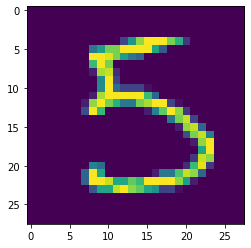

[1.3697926]


In [20]:
printImages(x_test, predicted_y, 15)

In [11]:
train_set = tf.data.Dataset.from_tensor_slices(((x_train,), (y_train,)))
test_set = tf.data.Dataset.from_tensor_slices(((x_test,), (y_test,)))

In [12]:
predicted_y = reg.predict(test_set)

KeyboardInterrupt: 